# Wine Classification Project
#### Peter Wallace
#### February 5, 2018


### To access offline, download prior and replace https:// path with local machine path

In [15]:
import pandas as pd
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header=None)
df = df.rename(columns={0:"Wine Class", 1:"Alcohol %", 2:"Malic Acid", 3:"Ash", 4:"Ash alcalinity", 5:"Magnesium", 
                        6:"Total phenols", 7:"Flavanoids", 8:"Nonflavanoid phenols", 9:"Proanthocyanins",
                       10:"Color intensity", 11:"Hue", 12:"OD280/OD315 of diluted wines", 13:"Proline"} )
#df.tail() to ensure data was read properly
df.tail()

,Wine Class,Alcohol %,Malic Acid,Ash,Ash alcalinity,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.7,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.3,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.2,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.3,0.60,1.62,840
177,3,14.13,4.10,2.74,24.5,96,2.05,0.76,0.56,1.35,9.2,0.61,1.60,560


### Plotting alcohol % and color intensity

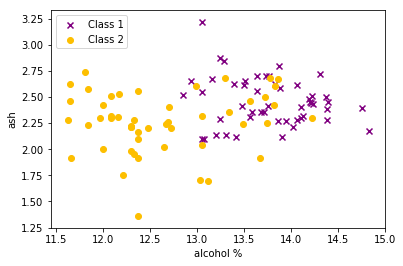

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# select only classes 1 and 2
y = df.iloc[0:130, 0].values
#sets to -1 if true and 1 if false
y = np.where(y == 1, -1, 1)

# extract alcohol % (second column) and ash (fourth column)
X = df.iloc[0:130, [1, 3]].values

# plot data
plt.scatter(X[:50, 0], X[:50, 1],
            color='purple', marker='x', label='Class 1')
plt.scatter(X[50:100, 0], X[50:100, 1],
            color='#FDBF00', marker='o', label='Class 2')

plt.xlabel('alcohol %')
plt.ylabel('ash')
plt.legend(loc='upper left')

plt.show()

## Predicting wine class: Perceptron implementation

In [17]:
import numpy as np
import pandas as pd


class Perceptron(object):
    """Perceptron classifier.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    random_state : int
      Random number generator seed for random weight
      initialization.

    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    errors_ : list
      Number of misclassifications (updates) in each epoch.

    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1,max_sse=100000):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
        self.max_sse = max_sse
        
    def fit(self, X, y):
        """Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features]
          Training vectors, where n_samples is the number of samples and
          n_features is the number of features.
        y : array-like, shape = [n_samples]
          Target values.

        Returns
        -------
        self : object

        """
        #set up NumPy random number generator with user specified seed
        rgen = np.random.RandomState(self.random_state)
        #initialize weights to random numbers with normal distribution with stddev .01
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        #initialize number of misclassifications in each each epoch
        self.errors_ = [] 
        self.sqerrors_ = []
        #underscore is shorthand for unimportant iterator value
        #self used to refer to current object
        i = 0
        sqerr = 0
        #while (i < self.n_iter and sqerr < self.max_sse):
        for _ in range(self.n_iter):
            sqerr = 0
            errors = 0
            #zip just creates tuples of points in the x, y plane 
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
                sqerr += (errors**2)
            self.errors_.append(errors)
            self.sqerrors_.append(sqerr)
        temp = np.array(self.sqerrors_)
        df = pd.Series(temp)
        print ("Sum of squared error over last 5 iterations: ")
        print (df.tail())
        return self

   
    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)

In [18]:
v1 = np.array([1, 2, 3])
v2 = 0.5 * v1
np.arccos(v1.dot(v2) / (np.linalg.norm(v1) * np.linalg.norm(v2)))

0.0

### Training the perceptron model

Sum of squared error over last 5 iterations: 
95    34460
96    31182
97    34460
98    34460
99    34460
dtype: int64


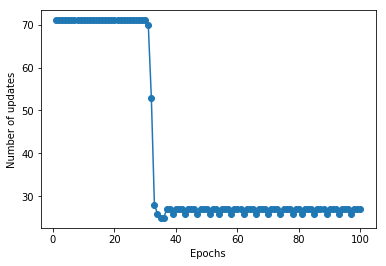

In [19]:
ppn = Perceptron(eta=.0000001, n_iter=100, max_sse=34460)

ppn.fit(X, y)
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o') 
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.show()

### Plotting the decision boundary between the two classes

In [20]:
from matplotlib.colors import ListedColormap


def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    #calculate min/max for features
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1 #maximum alcohol content
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1 #maximum ash content
    #create grid arrays with min/max vectors
    #arrange returns arrray with evenly spaced interval
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    #flatten xx1 and xx2 arrays; then transpose to make graph look pretty
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

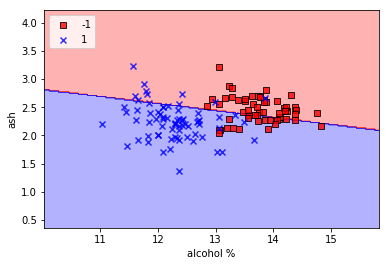

In [21]:
#plot decision boundary between alcohol and ash content
plot_decision_regions(X, y, classifier=ppn)

plt.xlabel('alcohol %')
plt.ylabel('ash')
plt.legend(loc='upper left')


# plt.savefig('images/02_08.png', dpi=300)
plt.show()

## Predicting wine class: Adaline implementation

In [22]:
class AdalineGD(object):
    """ADAptive LInear NEuron classifier.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    random_state : int
      Random number generator seed for random weight
      initialization.


    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    cost_ : list
      Sum-of-squares cost function value in each epoch.

    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

        
    #now unlike the perceptron we are updating the fit via gradient descent
    def fit(self, X, y):
        """ Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features]
          Training vectors, where n_samples is the number of samples and
          n_features is the number of features.
        y : array-like, shape = [n_samples]
          Target values.

        Returns
        -------
        self : object

        """
        rgen = np.random.RandomState(self.random_state)
        #init weights w normal distro and stdeva .01
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        #cost at each epoch
        self.cost_ = []

        for i in range(self.n_iter):
            net_input = self.net_input(X)
            # Please note that the "activation" method has no effect
            # in the code since it is simply an identity function. We
            # could write `output = self.net_input(X)` directly instead.
            # The purpose of the activation is more conceptual, i.e.,  
            # in the case of logistic regression (as we will see later), 
            # we could change it to
            # a sigmoid function to implement a logistic regression classifier.
            output = self.activation(net_input)
            errors = (y - output)
            #matrix vector multiplication between feature vector and error vector
            self.w_[1:] += self.eta * X.T.dot(errors)
            #SSE
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            #adding cost for this epoch to end of the list
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        """Compute linear activation"""
        return X

    def predict(self, X):
        """Return class label after unit step"""
        #if positive return 1 if negative return -1
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)

### Standardizing the values via feature scaling to improve gradient descent

In [23]:
# standardize features
X_std = np.copy(X)
X_std[:, 0] = (X[:, 0] - X[:, 0].mean()) / X[:, 0].std()
X_std[:, 1] = (X[:, 1] - X[:, 1].mean()) / X[:, 1].std()

### Graphing SSE and decision boundary with standardized features

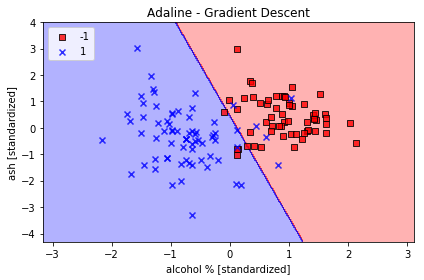

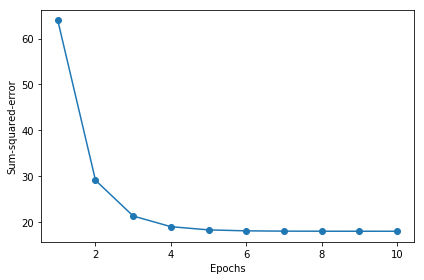

In [24]:
ada = AdalineGD(n_iter=10, eta=0.01) 
ada.fit(X_std, y)

plot_decision_regions(X_std, y, classifier=ada)
plt.title('Adaline - Gradient Descent')
plt.xlabel('alcohol % [standardized]')
plt.ylabel('ash [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

plt.plot(range(1, len(ada.cost_) + 1), ada.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Sum-squared-error')

plt.tight_layout()
# plt.savefig('images/02_14_2.png', dpi=300)
plt.show()